# **Objective **

Data is from the online food delivery company. Delivery time is important for customers and businesses because it can affect customer satisfaction in the food and delivery industry. Ensuring timely delivery is crucial in the food delivery industry.
By predicting the time taken from when a consumer places an order to when it is delivered, company can better inform its customers and improve their satisfaction.
We will predict the total delivery duration for orders.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
historical_data = pd.read_csv("/kaggle/input/percobaan-modeling-lomba/historical_data_percobaan.csv")
historical_data.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [3]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [4]:
from datetime import datetime 
historical_data["created_at"] = pd.to_datetime(historical_data['created_at'])
historical_data["actual_delivery_time"] = pd.to_datetime(historical_data['actual_delivery_time'])


In [5]:
historical_data["actual_total_delivery_duration"] = (historical_data["actual_delivery_time"] - historical_data["created_at"]).dt.total_seconds()
historical_data.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [6]:
historical_data['estimated_non_prep_duration'] = historical_data["estimated_store_to_consumer_driving_duration"] + historical_data["estimated_order_place_duration"]
historical_data.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0


In [7]:
historical_data["busy_dashers_ratio"] = historical_data["total_busy_dashers"] / historical_data["total_onshift_dashers"]

# **Data Preparation**

Categorical Variables- Check all data related to id's store id, market id, order_protocol

In [8]:
# check ids and decide whether to encode or not
historical_data["market_id"].nunique()



6

In [9]:
historical_data["store_id"].nunique()


6743

In [10]:
historical_data["order_protocol"].nunique()

7

In [11]:
store_id_unique = historical_data["store_id"].unique().tolist()
store_id_and_category = {store_id: historical_data[historical_data.store_id == store_id].store_primary_category.mode() 
                         for store_id in store_id_unique}


In [12]:
def fill(store_id):
    """Return primary store category from the dictionary"""
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

# fill null values
historical_data["nan_free_store_primary_category"] = historical_data.store_id.apply(fill)


**Dummy Variables**

Here, we will create dummy variables for order_protocol and market_id and view the first rows of the data frame.


In [13]:
order_protocol_dummies = pd.get_dummies(historical_data.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head()


,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [14]:
# create dummies for market_id
market_id_dummies = pd.get_dummies(historical_data.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head()


,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [15]:
# create dummies for store_primary_category
store_primary_category_dummies = pd.get_dummies(historical_data.nan_free_store_primary_category)
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()


,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Dataframe for modeling.Keep dummy variables
train_df = historical_data.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", "nan_free_store_primary_category", "order_protocol"])
train_df.head()


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,estimated_non_prep_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1307.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1136.0,2.000000
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1136.0,0.000000
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,735.0,1.000000
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1096.0,1.000000


In [17]:
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)
train_df = train_df.astype("float32")
train_df.head()


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Exploration**

In [18]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,545.358948,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093750,1.630255,522.038635,558.411377,34.526787,32.145733,52.661831,90.139648,219.352905,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#List Columns with missing values
train_df.columns[train_df.isnull().any()]

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration',
       'actual_total_delivery_duration', 'estimated_non_prep_duration',
       'busy_dashers_ratio'],
      dtype='object')

In [20]:
#List Columns with inf values
train_df.columns[np.where(np.any(~np.isfinite(train_df),axis=0) == True)]

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration',
       'actual_total_delivery_duration', 'estimated_non_prep_duration',
       'busy_dashers_ratio'],
      dtype='object')

In [21]:
train_df["busy_dashers_ratio"].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [22]:
#Replace inf's with Nan's and drop it
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.shape


(177070, 100)

In [23]:
train_df.isna().sum().sum()

0

In [24]:
#find inf values
np.where(np.any(~np.isfinite(train_df),axis=0) == True)

(array([], dtype=int64),)

array([[<Axes: title={'center': 'total_items'}>,
        <Axes: title={'center': 'subtotal'}>,
        <Axes: title={'center': 'num_distinct_items'}>,
        <Axes: title={'center': 'min_item_price'}>,
        <Axes: title={'center': 'max_item_price'}>,
        <Axes: title={'center': 'total_onshift_dashers'}>,
        <Axes: title={'center': 'total_busy_dashers'}>,
        <Axes: title={'center': 'total_outstanding_orders'}>,
        <Axes: title={'center': 'estimated_order_place_duration'}>,
        <Axes: title={'center': 'estimated_store_to_consumer_driving_duration'}>],
       [<Axes: title={'center': 'actual_total_delivery_duration'}>,
        <Axes: title={'center': 'estimated_non_prep_duration'}>,
        <Axes: title={'center': 'busy_dashers_ratio'}>,
        <Axes: title={'center': 'order_protocol_1.0'}>,
        <Axes: title={'center': 'order_protocol_2.0'}>,
        <Axes: title={'center': 'order_protocol_3.0'}>,
        <Axes: title={'center': 'order_protocol_4.0'}>,
    

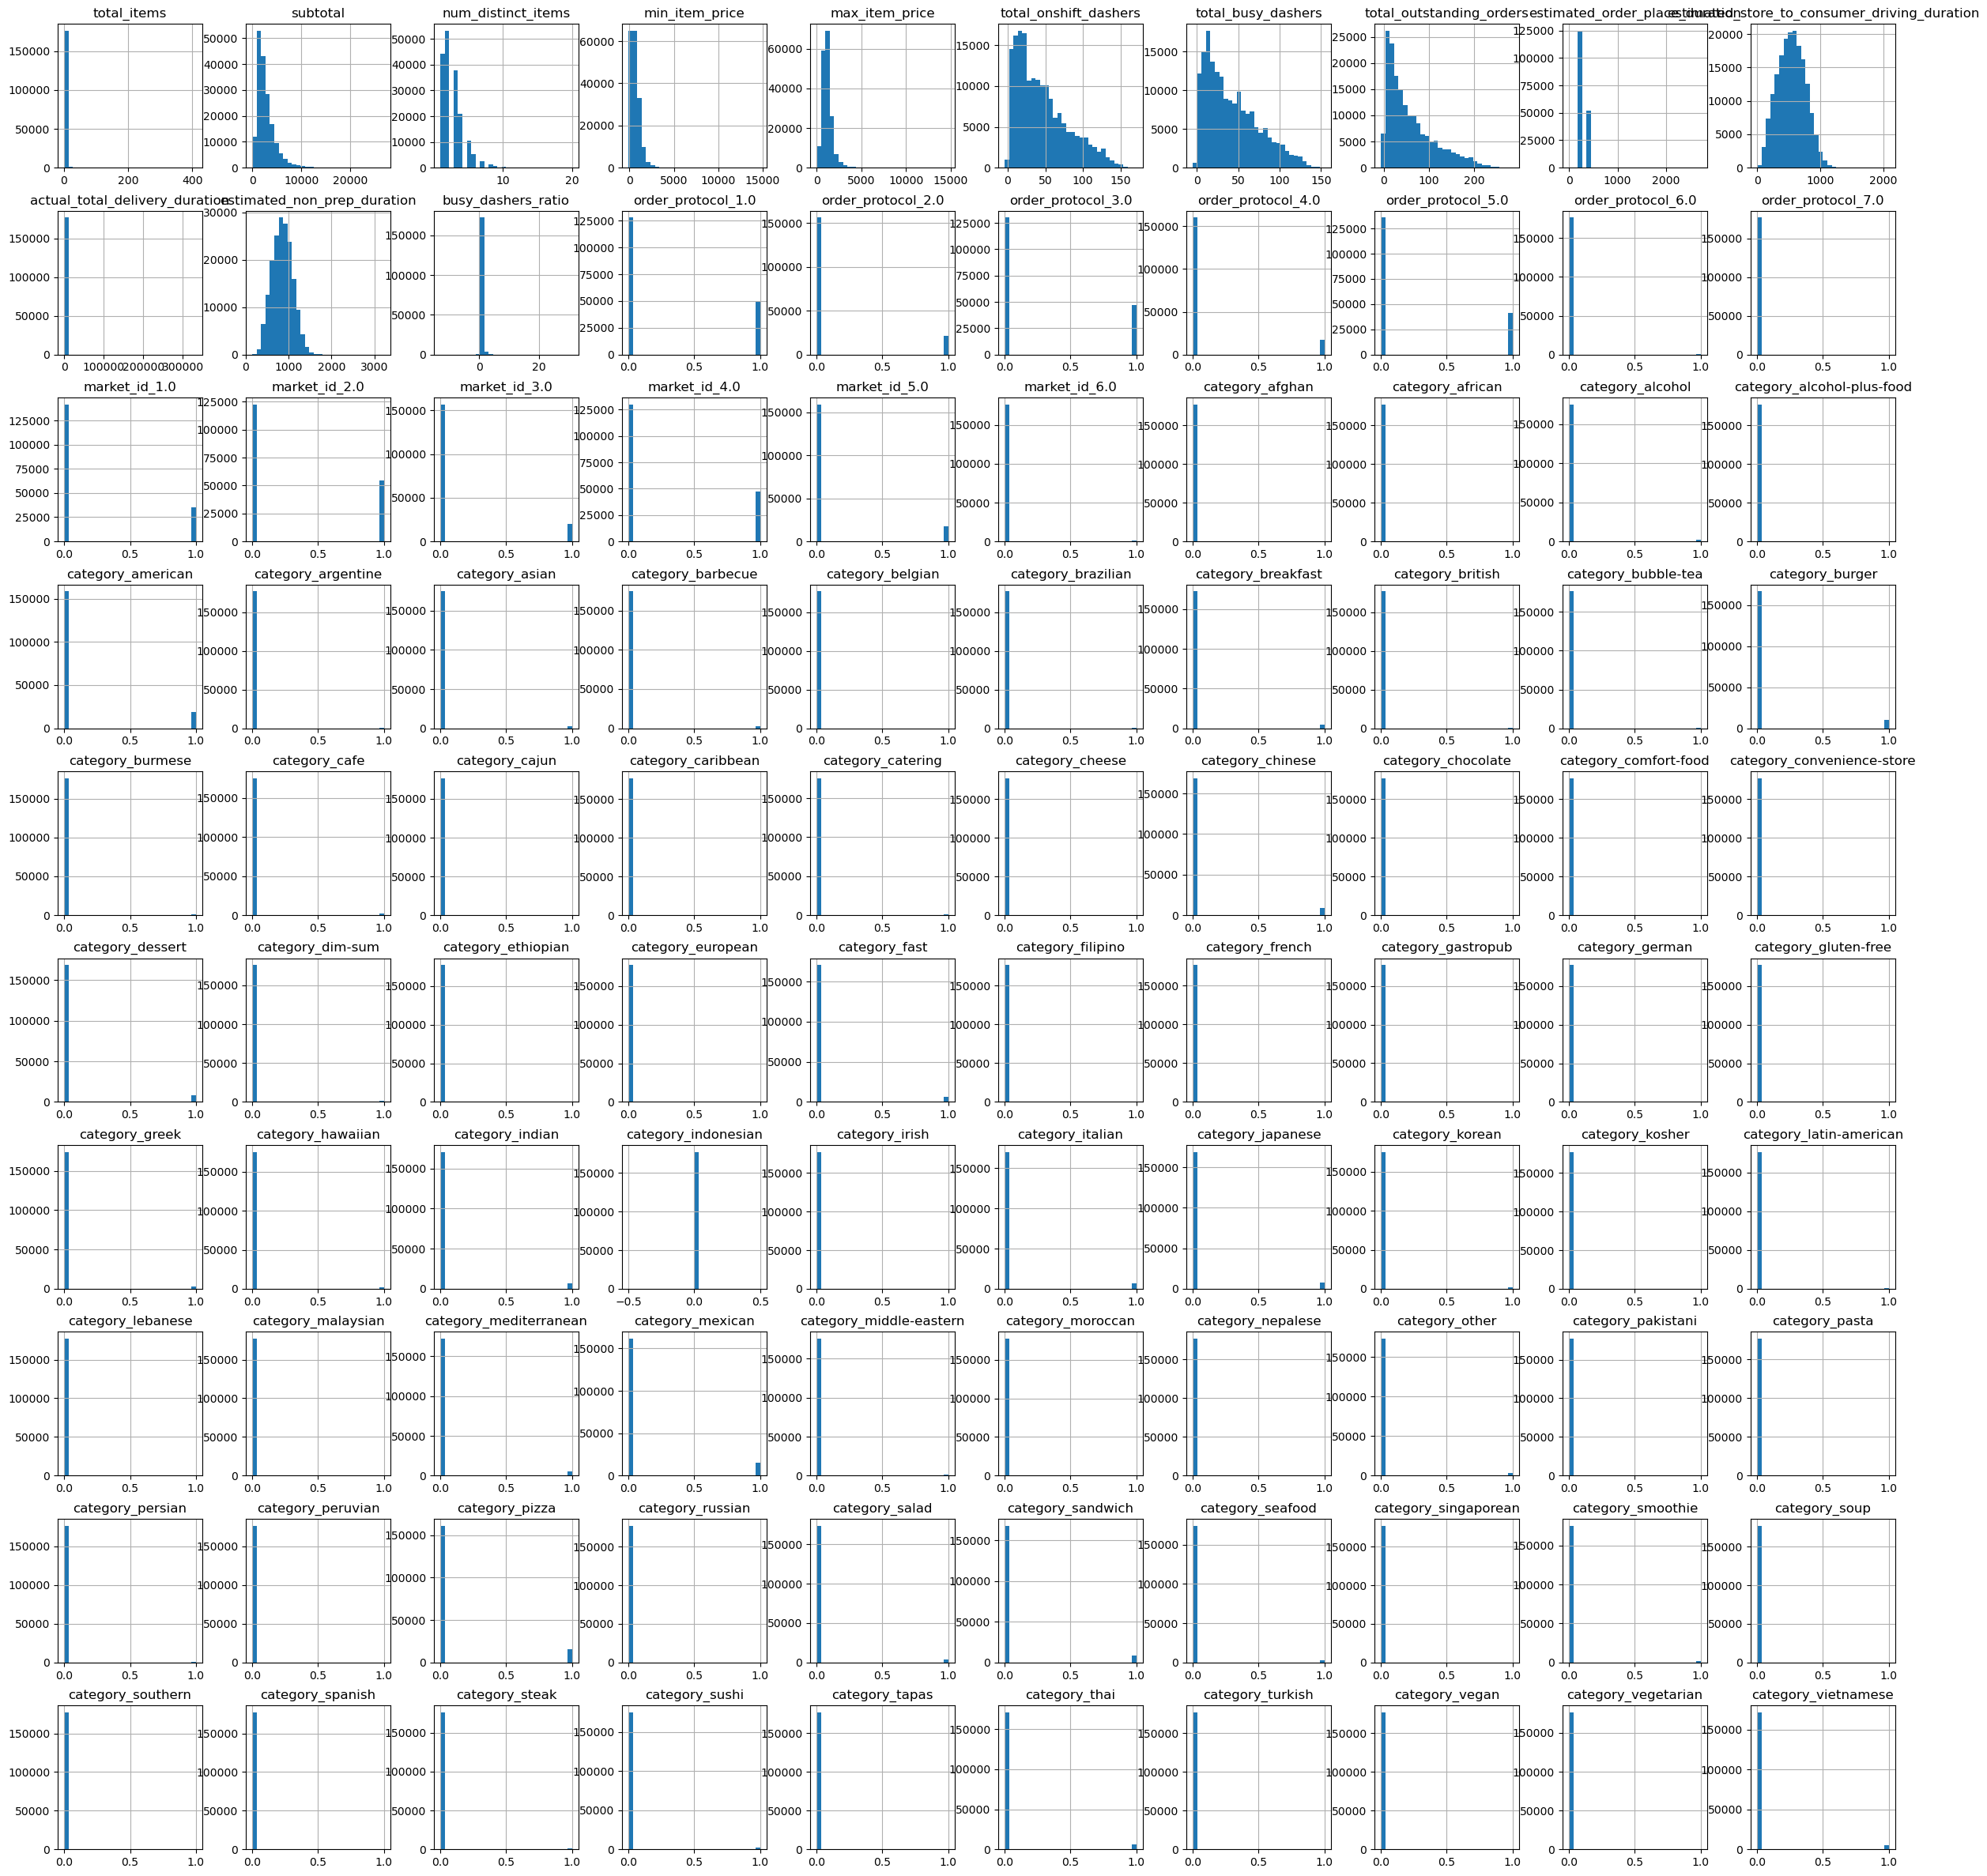

In [25]:
train_df.hist(bins=30, figsize=(30, 30))

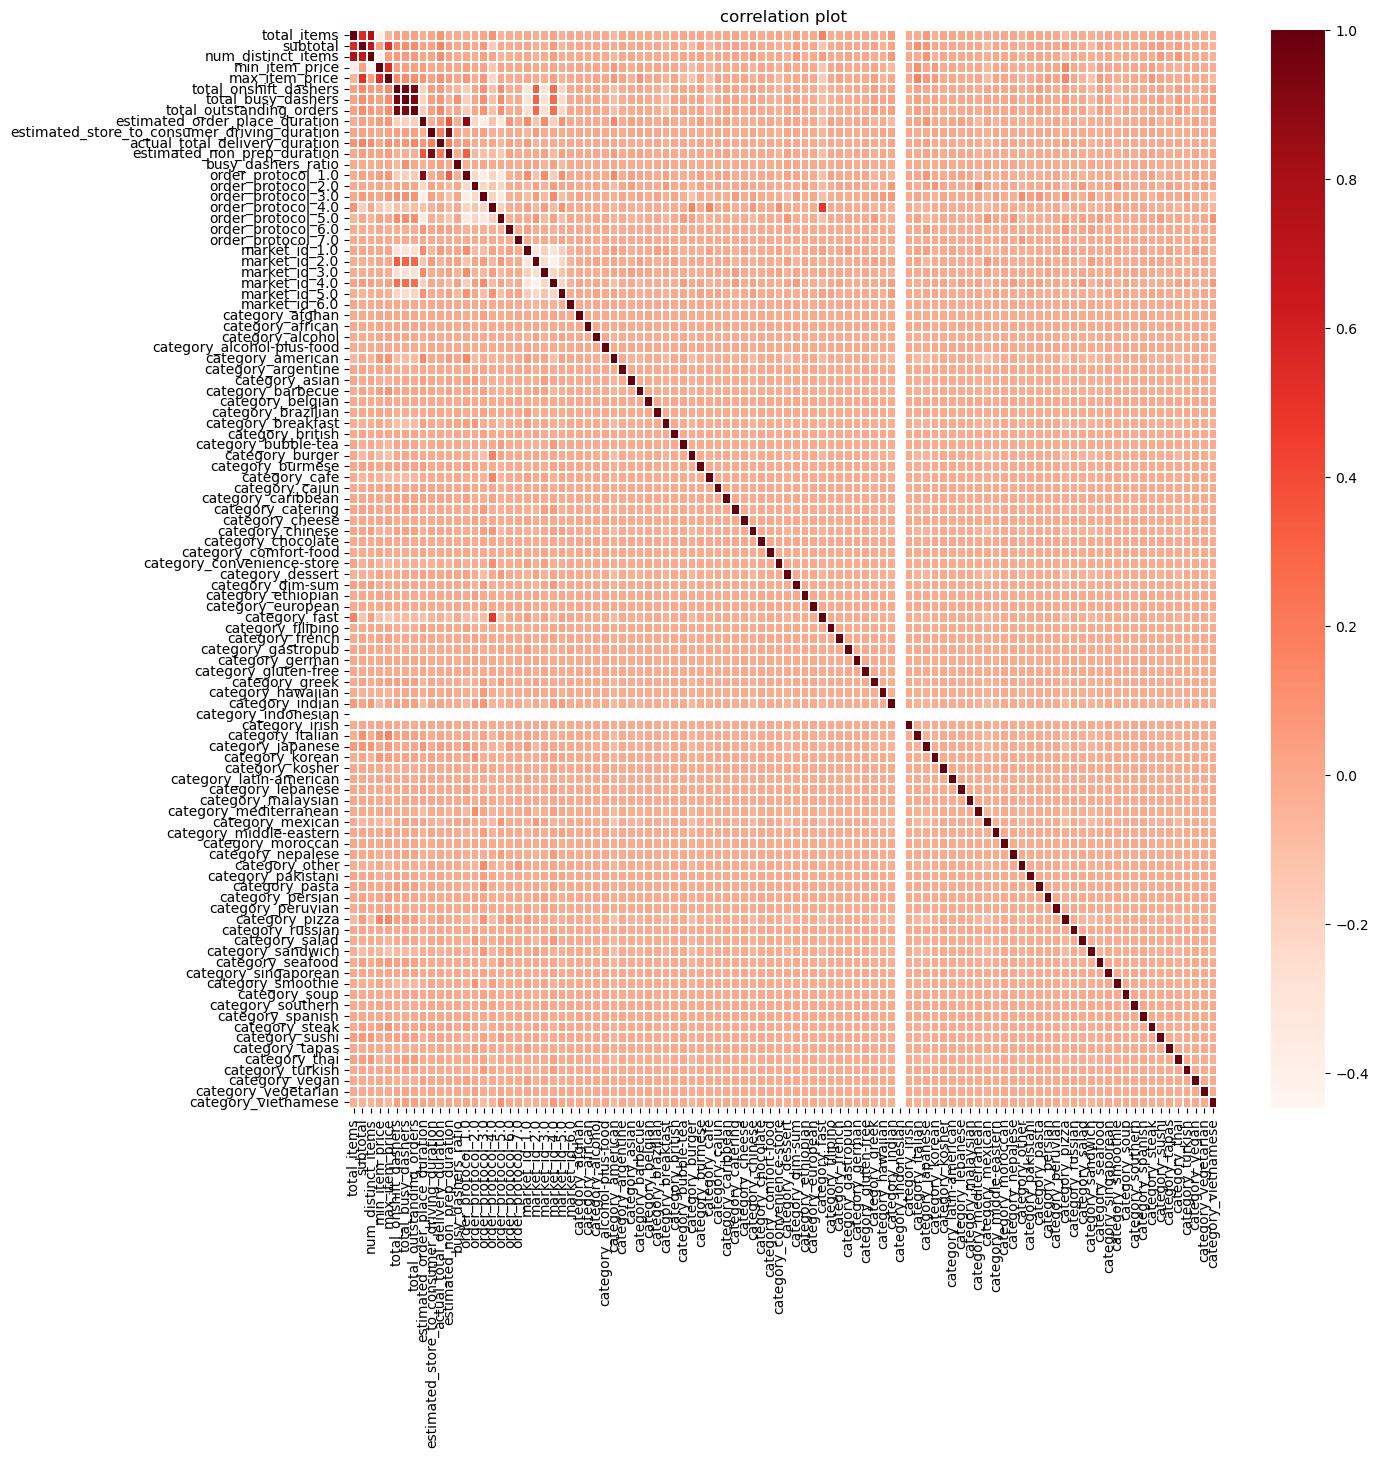

In [26]:
#Correlation
plt.figure(figsize = (14,14))
plt.title('correlation plot')
corr = train_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

There are some issues with 'category_indonesioan'. Lets check it in detail

In [27]:
train_df['category_indonesian'].describe()

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

All values are 0.Lets drop this feature.

Since there are some features whihc are correlated with each other, lets find the these pairs with high correlation.

In [28]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


In [29]:
#Removing Redundant Pairs
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [30]:
print("Top 25 features with high Correlations")
print(get_top_abs_correlations(train_df, 25))


Top 25 features with high Correlations
total_onshift_dashers                         total_busy_dashers             0.941741
                                              total_outstanding_orders       0.934639
total_busy_dashers                            total_outstanding_orders       0.931295
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0             0.897645
total_items                                   num_distinct_items             0.758146
subtotal                                      num_distinct_items             0.682890
total_items                                   subtotal                       0.557175
min_item_price                                max_item_price                 0.541241
subtotal                                      max_item_price                 0.507947
order_protocol_4.0                            category_fast                  0.489946
num_distinct_it

In [31]:
#merge our numerical features with the dummy variables
train_df = historical_data.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])
train_df = pd.concat([train_df, store_primary_category_dummies], axis=1)
train_df = train_df.drop(columns=["total_onshift_dashers", "total_busy_dashers",
   "category_indonesian", "estimated_non_prep_duration"])
train_df = train_df.astype("float32")

train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.head()


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print("Top 25 features with high Correlations")
print(get_top_abs_correlations(train_df, 25))

Top 25 features with high Correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
subtotal                                      actual_total_delivery_duration    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast            

**Feature Addition**


Variables related to items, price seems to be correlated with each other.

In [33]:
#Create new variables based on the existing variables, Drop the existing variables. 
train_df["percent_distinct_item_of_total"] = train_df["num_distinct_items"] / train_df["total_items"]
train_df["avg_price_per_item"] = train_df["subtotal"] / train_df["total_items"]
train_df["price_range_of_items"] = train_df["max_item_price"] - train_df["min_item_price"]
train_df.drop(columns =["num_distinct_items", "subtotal","max_item_price", "min_item_price"], inplace=True)
print("Top 25 features with high Correlations")
print(get_top_abs_correlations(train_df, 25))


Top 25 features with high Correlations
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158193
total_outstanding_orders                      actual_total_delivery_dur

In [34]:
train_df.shape

(177070, 82)

**Feature Importance using VIF**


Out of 100 Columns we have removed 18 and added 2.Lets check Multicolinearilty in the data using VIF

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)


In [36]:
features = train_df.drop(columns=["actual_total_delivery_duration"]).columns.to_list()
vif_data = compute_vif(features)
vif_data


,feature,VIF
0,category_alcohol-plus-food,1.000371
1,category_chocolate,1.000498
2,category_belgian,1.000760
3,category_russian,1.003231
4,category_african,1.003823
...,...,...
76,busy_dashers_ratio,6.369601
77,category_american,7.033604
78,estimated_store_to_consumer_driving_duration,7.210844
79,estimated_order_place_duration,13.472279


In [37]:
#Identify features with high VIF and drop them from dataset
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("Lets remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data


Lets remove percent_distinct_item_of_total


,feature,VIF
0,category_alcohol-plus-food,1.000222
1,category_chocolate,1.000369
2,category_belgian,1.000461
3,category_russian,1.002022
4,category_gluten-free,1.002372
...,...,...
75,category_american,4.505928
76,avg_price_per_item,5.958972
77,busy_dashers_ratio,6.357889
78,estimated_store_to_consumer_driving_duration,7.192644


In [38]:
print(selected_features)

['category_alcohol-plus-food', 'category_chocolate', 'category_belgian', 'category_russian', 'category_gluten-free', 'category_african', 'category_european', 'category_comfort-food', 'category_spanish', 'category_cheese', 'category_moroccan', 'category_singaporean', 'category_southern', 'category_kosher', 'category_soup', 'category_irish', 'category_argentine', 'category_german', 'category_tapas', 'category_afghan', 'category_malaysian', 'category_pakistani', 'category_ethiopian', 'category_british', 'category_lebanese', 'category_gastropub', 'category_turkish', 'category_convenience-store', 'category_peruvian', 'category_vegan', 'category_nepalese', 'category_brazilian', 'category_filipino', 'category_caribbean', 'category_bubble-tea', 'category_cajun', 'category_latin-american', 'category_french', 'category_pasta', 'category_persian', 'category_vegetarian', 'category_burmese', 'category_dim-sum', 'category_smoothie', 'category_middle-eastern', 'category_hawaiian', 'category_steak', '

In [39]:
#Feature Selection- To identify redundent features
#select our features and split the data into test and training data.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = train_df[selected_features]
y = train_df["actual_total_delivery_duration"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


**Feature importance using GINI Index**

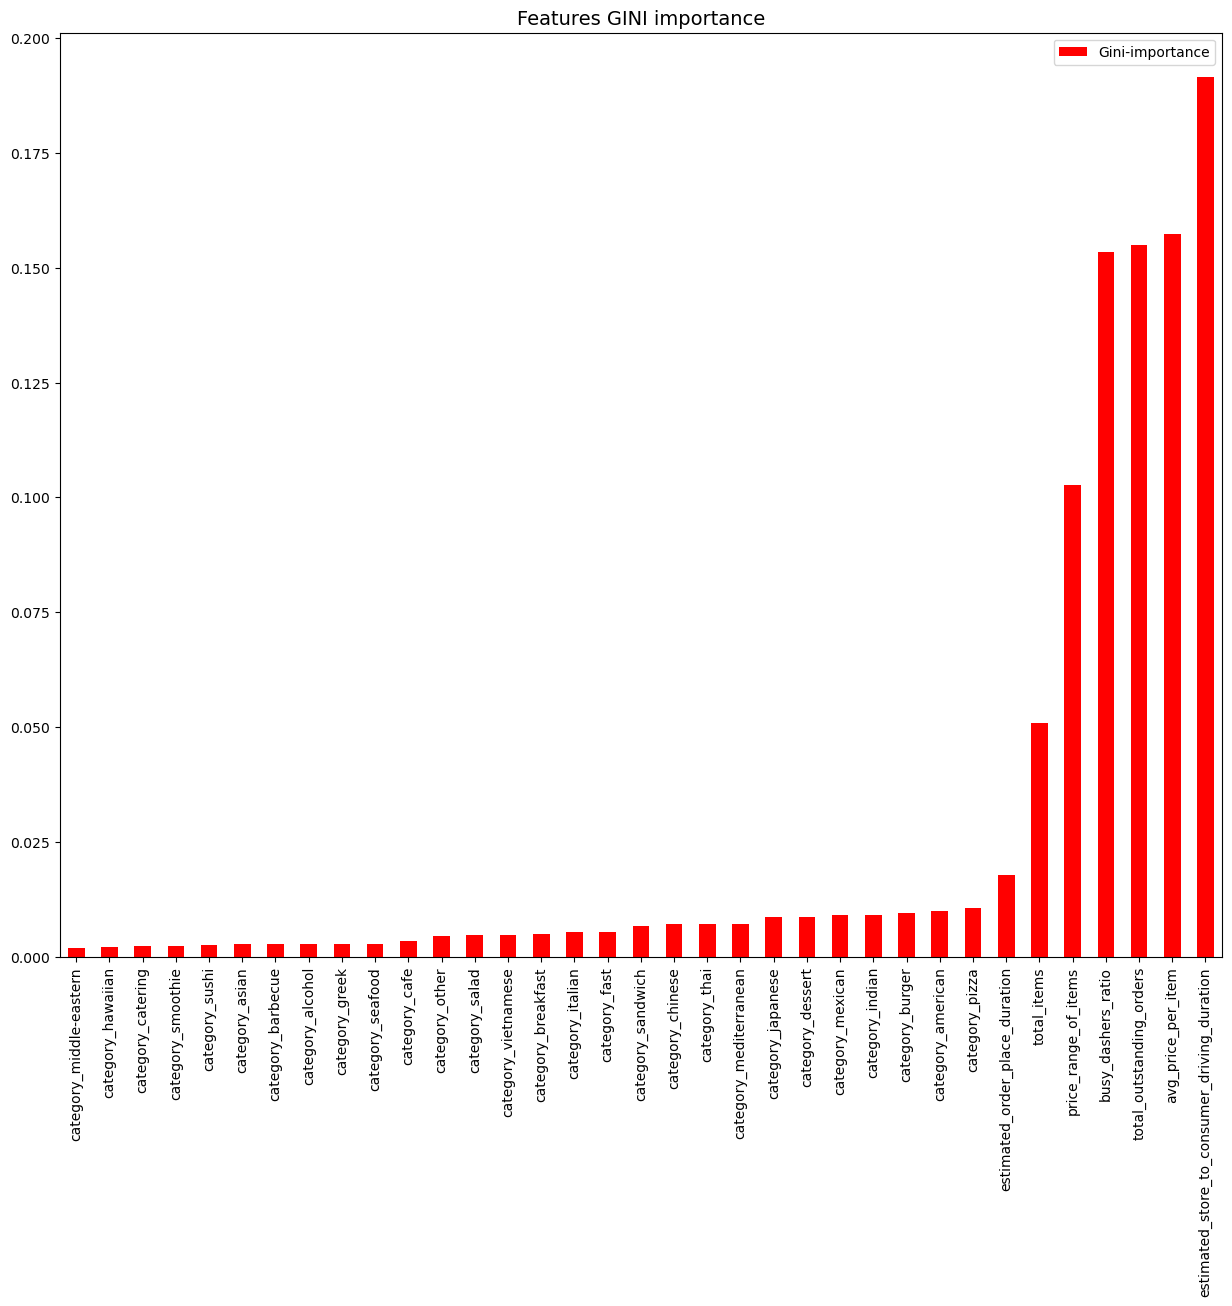

In [40]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#importances.sort_values(by='Gini-importance').plot(kind='bar',color='R', rot=90, figsize=(15,12))
importances.sort_values(by='Gini-importance')[-35:].plot(kind='bar',color='r', rot=90, figsize=(15,12))
plt.title('Features GINI importance',fontsize=14)
plt.show()


**Principal Component Analysis**


Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

/tmp/ipykernel_32/2438994970.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


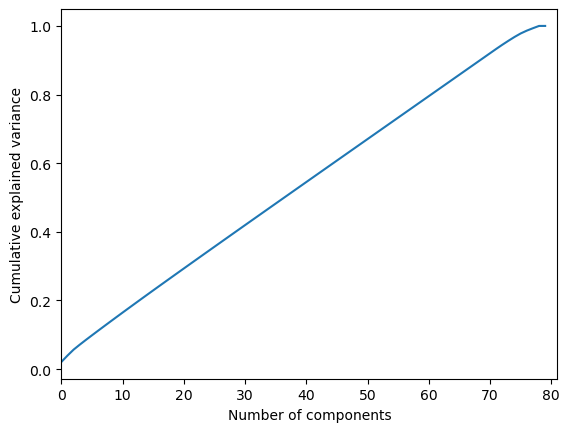

In [41]:
# performing preprocessing part
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_std = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

60 features explain 80% of our data frame.So we will not do any dimension reduction.

# **Machine Learning Models**

Lets try different machine learning techniques with different combinations of scaling, features selected.

* Scaling of Data- MinMaxScaler, StandardScaler
* Models - "Ridge" ,"DecisionTree" ,"RandomForest" ,LGBMRegressor, MLPRegressor
* Feaure Selection using GINI Index - all features, Top 60 features, Top40 featues, Top 20,Top 10 features


In [42]:
#Define functions for scaling,
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(scaler, X, y):
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler


In [43]:
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42)


In [44]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    # return RMSE with squared False     
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
    print("Error = "'{}'.format(rmse_error)+" in " + model_name)
    
    return rmse_error, y_predict


In [45]:
def model(x_train,y_train,x_test,y_test,model, model_name, verbose=True):
    
    model.fit(x_train,y_train)
    y_predict_train=model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict_train, squared=False)
    y_predict_test = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict_test, squared=False)
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in " + model_name)
        print("Test error = "'{}'.format(test_error)+" in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error


In [46]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model


In [47]:
#Define a function to fit the models calculate he evaluation metrics, train and test error for all models
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in " + model_name)
        print("Test error = "'{}'.format(test_error)+" in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error


In [48]:
#Lets store regression models, feature sets, scaler names, and RMSE for each model
pred_dict = {
    "regression_model": [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE": [],
}


In [49]:
# Lets define different dictionary with regression model
regression_models = {
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP":  MLPRegressor(), }


In [50]:
# Lets define different dictionary with different features sets
feature_sets = {
    "full dataset": X.columns.to_list(),
    "selected_features_60": importances.sort_values(by='Gini-importance')[-60:].index.tolist(),
    "selected_features_40": importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    "selected_features_20": importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_10": importances.sort_values(by='Gini-importance')[-10:].index.tolist(), }


In [51]:
#Lets try different scaling methods.
scalers = {
    "Standard scaler": StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "NotScale": None,
}


In [52]:
for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():   
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df["actual_total_delivery_duration"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
            
            else:
                
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)
#Ref: https://platform.stratascratch.com/data-projects/delivery-duration-prediction

-----scaled with Standard scaler-------- included columns are full dataset

Error = 2053.698486328125 in Ridge
Error = 2057.2476687088733 in DecisionTree
Error = 2048.4492630482096 in RandomForest
Error = 2036.2498779296875 in XGBoost
Error = 2033.4355809987908 in LGBM
Error = 2037.2738037109375 in MLP
-----scaled with MinMax scaler-------- included columns are full dataset

Error = 2053.962890625 in Ridge
Error = 2057.2476685732177 in DecisionTree
Error = 2047.7151277043604 in RandomForest
Error = 2035.351318359375 in XGBoost
Error = 2034.4499976619875 in LGBM
Error = 2106.294677734375 in MLP
-----scaled with NotScale-------- included columns are full dataset



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.42528e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1071.4971923828125 in Ridge
Test error = 2053.692626953125 in Ridge
Train error = 1067.7815291116704 in DecisionTree
Test error = 2057.2476684096064 in DecisionTree
Train error = 396.88904535846854 in RandomForest
Test error = 2048.3507371171313 in RandomForest
Train error = 968.2471313476562 in XGBoost
Test error = 2036.43212890625 in XGBoost
Train error = 1017.5549840201221 in LGBM
Test error = 2034.461097275308 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1053.9112548828125 in MLP
Test error = 2046.6580810546875 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_60

Error = 2053.806640625 in Ridge
Error = 2057.2476687088733 in DecisionTree
Error = 2048.252551676951 in RandomForest
Error = 2036.5145263671875 in XGBoost
Error = 2033.5482607641832 in LGBM
Error = 2039.569580078125 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_60

Error = 2054.074951171875 in Ridge
Error = 2057.2476685732177 in DecisionTree
Error = 2049.0451301510857 in RandomForest
Error = 2036.16357421875 in XGBoost
Error = 2034.865953678364 in LGBM
Error = 2298.603271484375 in MLP
-----scaled with NotScale-------- included columns are selected_features_60



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.82125e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1071.71044921875 in Ridge
Test error = 2053.803466796875 in Ridge
Train error = 1067.7815291116704 in DecisionTree
Test error = 2057.2476684096064 in DecisionTree
Train error = 396.87850725228145 in RandomForest
Test error = 2048.5587747698687 in RandomForest
Train error = 969.1565551757812 in XGBoost
Test error = 2036.269287109375 in XGBoost
Train error = 1017.3905701929224 in LGBM
Test error = 2034.2908836160593 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1054.572265625 in MLP
Test error = 2047.7822265625 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_40

Error = 2054.00439453125 in Ridge
Error = 2056.5292024696128 in DecisionTree
Error = 2048.463726467614 in RandomForest
Error = 2035.453369140625 in XGBoost
Error = 2034.6538984910121 in LGBM
Error = 2037.2613525390625 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_40

Error = 2054.27734375 in Ridge
Error = 2056.5292023632996 in DecisionTree
Error = 2048.0656181973636 in RandomForest
Error = 2034.2847900390625 in XGBoost
Error = 2035.196536738781 in LGBM
Error = 2109.400390625 in MLP
-----scaled with NotScale-------- included columns are selected_features_40

Train error = 1072.35498046875 in Ridge
Test error = 2054.00439453125 in Ridge


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.55922e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1067.785563647774 in DecisionTree
Test error = 2056.529202224364 in DecisionTree
Train error = 395.616257274412 in RandomForest
Test error = 2048.3568106550956 in RandomForest
Train error = 965.6858520507812 in XGBoost
Test error = 2035.7642822265625 in XGBoost
Train error = 1017.1430421117441 in LGBM
Test error = 2034.8058530174258 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1054.4791259765625 in MLP
Test error = 2047.1575927734375 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_20

Error = 2055.36572265625 in Ridge
Error = 2054.610311207463 in DecisionTree
Error = 2049.703259712837 in RandomForest
Error = 2037.6336669921875 in XGBoost
Error = 2036.0233846729805 in LGBM
Error = 2038.6568603515625 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_20

Error = 2055.653076171875 in Ridge
Error = 2054.6103112689557 in DecisionTree
Error = 2048.4443739336994 in RandomForest
Error = 2036.5164794921875 in XGBoost
Error = 2035.581516471472 in LGBM
Error = 2100.074462890625 in MLP
-----scaled with NotScale-------- included columns are selected_features_20

Train error = 1074.506591796875 in Ridge
Test error = 2055.36572265625 in Ridge


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.43857e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train error = 1069.1350906055598 in DecisionTree
Test error = 2054.610311170708 in DecisionTree
Train error = 397.66183393609754 in RandomForest
Test error = 2048.2234460199456 in RandomForest
Train error = 966.1651000976562 in XGBoost
Test error = 2036.249267578125 in XGBoost
Train error = 1018.9600610110249 in LGBM
Test error = 2035.9494403356318 in LGBM


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error = 1058.1142578125 in MLP
Test error = 2048.52587890625 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_10

Error = 2056.568359375 in Ridge
Error = 2054.5971761770547 in DecisionTree
Error = 2051.6784892299306 in RandomForest
Error = 2040.27001953125 in XGBoost
Error = 2038.1313604554389 in LGBM
Error = 2040.6707763671875 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_10

Error = 2056.882080078125 in Ridge
Error = 2054.5971762373274 in DecisionTree
Error = 2051.01473248483 in RandomForest
Error = 2039.515625 in XGBoost
Error = 2037.6564489201091 in LGBM
Error = 2082.609619140625 in MLP
-----scaled with NotScale-------- included columns are selected_features_10

Train error = 1076.7279052734375 in Ridge
Test error = 2056.568359375 in Ridge
Train error = 1069.2324011708552 in DecisionTree
Test error = 2054.597176140608 in DecisionTree
Train error = 399.29888659979173 in RandomForest
Test error = 2051.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
results_df = pd.DataFrame(pred_dict)
results_df.sort_values(by=['RMSE'], ascending=False)
print(results_df)


   regression_model           feature_set      scaler_name         RMSE
0             Ridge          full dataset  Standard scaler  2053.698486
1      DecisionTree          full dataset  Standard scaler  2057.247669
2      RandomForest          full dataset  Standard scaler  2048.449263
3           XGBoost          full dataset  Standard scaler  2036.249878
4              LGBM          full dataset  Standard scaler  2033.435581
..              ...                   ...              ...          ...
85     DecisionTree  selected_features_10         NotScale  2082.609619
86     RandomForest  selected_features_10         NotScale  2082.609619
87          XGBoost  selected_features_10         NotScale  2082.609619
88             LGBM  selected_features_10         NotScale  2082.609619
89              MLP  selected_features_10         NotScale  2082.609619

[90 rows x 4 columns]


In [54]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   regression_model  90 non-null     object 
 1   feature_set       90 non-null     object 
 2   scaler_name       90 non-null     object 
 3   RMSE              90 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.9+ KB


In [55]:
sorted_df= results_df.sort_values(by=['RMSE'])

In [56]:
print(sorted_df.to_markdown())

|    | regression_model   | feature_set          | scaler_name     |    RMSE |
|---:|:-------------------|:---------------------|:----------------|--------:|
|  4 | LGBM               | full dataset         | Standard scaler | 2033.44 |
| 22 | LGBM               | selected_features_60 | Standard scaler | 2033.55 |
| 45 | XGBoost            | selected_features_40 | MinMax scaler   | 2034.28 |
| 10 | LGBM               | full dataset         | MinMax scaler   | 2034.45 |
| 40 | LGBM               | selected_features_40 | Standard scaler | 2034.65 |
| 28 | LGBM               | selected_features_60 | MinMax scaler   | 2034.87 |
| 46 | LGBM               | selected_features_40 | MinMax scaler   | 2035.2  |
|  9 | XGBoost            | full dataset         | MinMax scaler   | 2035.35 |
| 39 | XGBoost            | selected_features_40 | Standard scaler | 2035.45 |
| 64 | LGBM               | selected_features_20 | MinMax scaler   | 2035.58 |
| 58 | LGBM               | selected_features_20 | S

<Axes: >

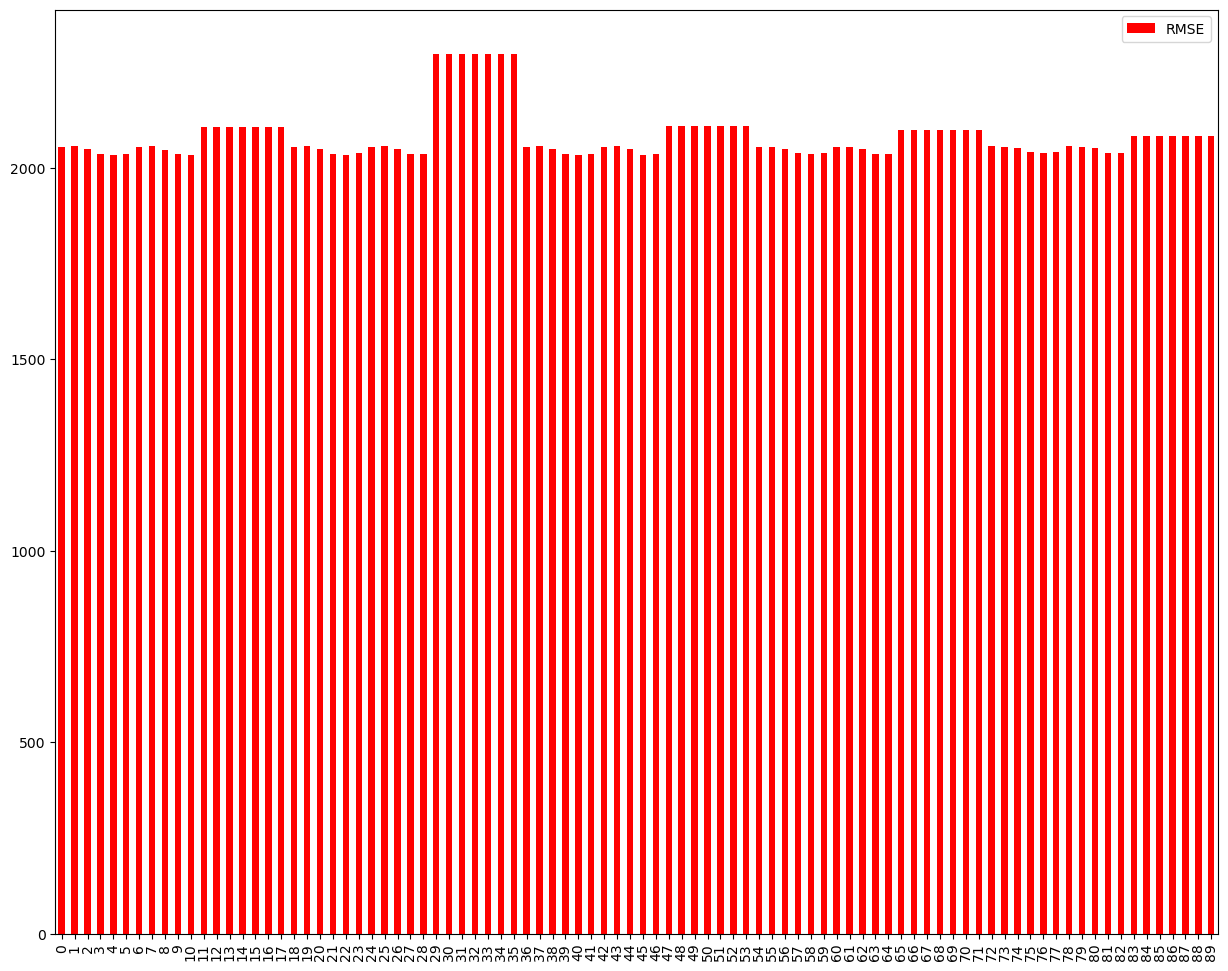

In [57]:
results_df.plot(kind='bar',color='r', figsize=(15,12))


# **Final Model**

It seems that LGBM is the the best solution.We can finetune the results with Hyperparameter tuning.We can use Top 40 features in the model, Also, RMSE doesn't affect much with change of scaling transformation.Lets go into the details of the model with 40 Selected features with LGBM.

In [58]:
selected_features=  importances.sort_values(by='Gini-importance')[-40:].index.tolist()
print(selected_features)

['category_brazilian', 'category_dim-sum', 'category_steak', 'category_vegetarian', 'category_korean', 'category_middle-eastern', 'category_hawaiian', 'category_catering', 'category_smoothie', 'category_sushi', 'category_asian', 'category_barbecue', 'category_alcohol', 'category_greek', 'category_seafood', 'category_cafe', 'category_other', 'category_salad', 'category_vietnamese', 'category_breakfast', 'category_italian', 'category_fast', 'category_sandwich', 'category_chinese', 'category_thai', 'category_mediterranean', 'category_japanese', 'category_dessert', 'category_mexican', 'category_indian', 'category_burger', 'category_american', 'category_pizza', 'estimated_order_place_duration', 'total_items', 'price_range_of_items', 'busy_dashers_ratio', 'total_outstanding_orders', 'avg_price_per_item', 'estimated_store_to_consumer_driving_duration']


In [71]:
from pandas import DataFrame
X = train_df[['category_brazilian', 'category_dim-sum', 'category_steak', 'category_vegetarian', 'category_korean', 'category_middle-eastern', 'category_hawaiian', 'category_catering', 'category_smoothie', 'category_sushi', 'category_asian', 'category_barbecue', 'category_alcohol', 'category_greek', 'category_seafood', 'category_cafe', 'category_other', 'category_salad', 'category_vietnamese', 'category_breakfast', 'category_italian', 'category_fast', 'category_sandwich', 'category_chinese', 'category_thai', 'category_mediterranean', 'category_japanese', 'category_dessert', 'category_mexican', 'category_indian', 'category_burger', 'category_american', 'category_pizza', 'estimated_order_place_duration', 'total_items', 'price_range_of_items', 'busy_dashers_ratio', 'total_outstanding_orders', 'avg_price_per_item', 'estimated_store_to_consumer_driving_duration']]
y = train_df["actual_total_delivery_duration"]
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [72]:
X.head()

,category_brazilian,category_dim-sum,category_steak,category_vegetarian,category_korean,category_middle-eastern,category_hawaiian,category_catering,category_smoothie,category_sushi,...,category_burger,category_american,category_pizza,estimated_order_place_duration,total_items,price_range_of_items,busy_dashers_ratio,total_outstanding_orders,avg_price_per_item,estimated_store_to_consumer_driving_duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,446.0,4.0,682.0,0.424242,21.0,860.25,861.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,446.0,1.0,0.0,2.000000,2.0,1900.00,690.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,446.0,1.0,0.0,0.000000,0.0,1900.00,690.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,446.0,6.0,1200.0,1.000000,2.0,1150.00,289.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,446.0,3.0,500.0,1.000000,9.0,1300.00,650.0


In [73]:
X.shape,y.shape

((177070, 40), (177070,))

In [74]:
x_train.shape, y_train.shape

((141656, 40), (141656,))

In [65]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [75]:
import lightgbm as lgb

In [78]:
# laoding data
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [79]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 4.38862e+06	valid_0's l1: 817.568
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 4.36593e+06	valid_0's l1: 808.799
[3]	valid_0's l2: 4.34627e+06	valid_0's l1: 801.045
[4]	valid_0's l2: 4.33061e+06	valid_0's l1: 794.352
[5]	valid_0's l2: 4.31638e+06	valid_0's l1: 788.756
[6]	valid_0's l2: 4.3044e+06	valid_0's l1: 783.621
[7]	valid_0's l2: 4.29302e+06	valid_0's l1: 778.885
[8]	valid_0's l2: 4.28293e+06	valid_0's l1: 774.771
[9]	valid_0's l2: 4.27401e+06	valid_0's l1: 771.247
[10]	valid_0's l2: 4.26638e+06	valid_0's l1: 768.09
[11]	valid_0's l2: 4.25886e+06	valid_0's l1: 765.165
[12]	valid_0's l2: 4.25217e+06	valid_0's l1: 762.409
[13]	valid_0's l2: 4.24644e+06	valid_0's l1: 759.91
[14]	valid_0's l2: 4.24023e+06	valid_0's l1: 757.236
[15]	valid_0's l2: 4.23489e+06	valid_0's l1: 754.969
[16]	valid_0's l2: 4.22994e+06	valid_0's l1: 752.646
[17]	valid_0's l2: 4.22527e+06	valid_0's l1: 750.698
[18]	valid_0's l2: 4.22109e+06	valid_0's l1: 748.9

In [80]:
# prediction
y_pred = model.predict(x_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

MSE: 4148466.43
RMSE: 2036.78


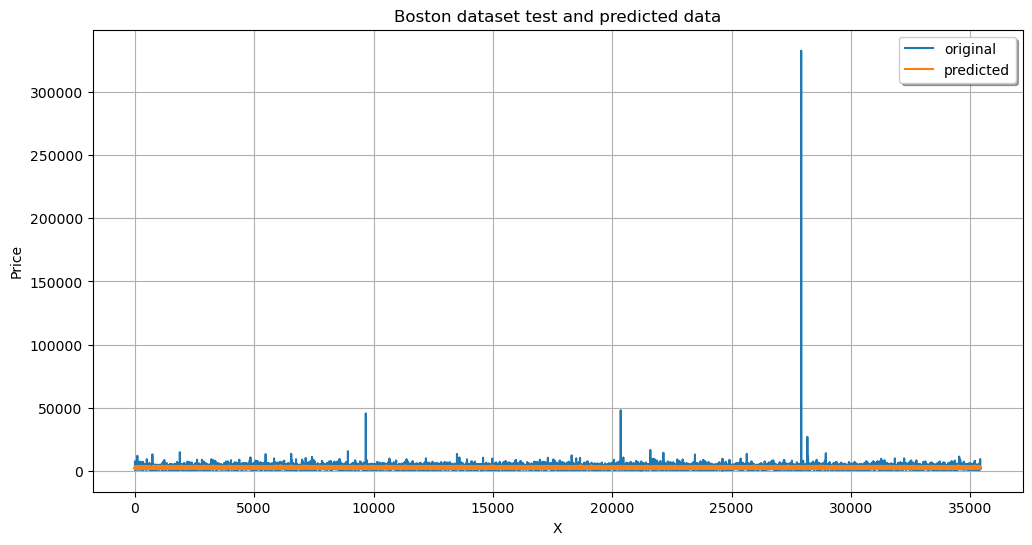

In [81]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

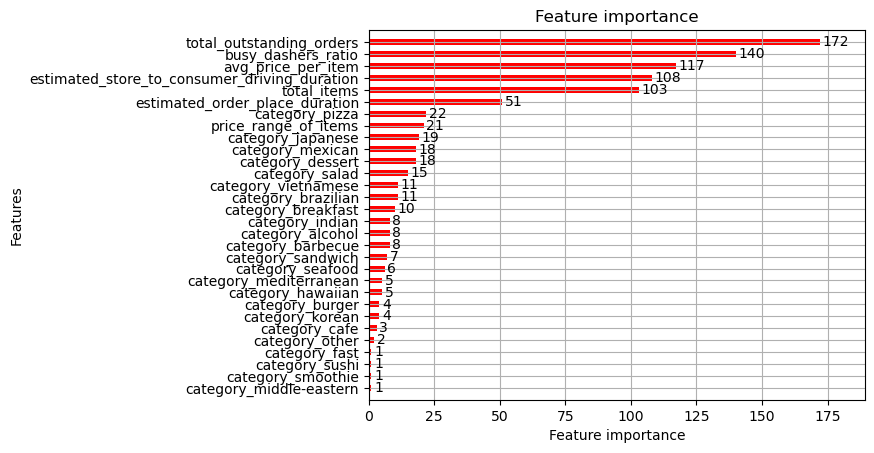

In [82]:
# plotting feature importance
lgb.plot_importance(model,color='r', height=.5)

**Conclusion**

Goal was to predict the total delivery duration of food orders for an online food delevery company.Timely delivery is very important for business as well as customers.We hfollowed following approach in buildind a model whihc predicts the delivery time.
* Data Preparation ( feature selection, new feature creation)
* Dimension Reduction- Redundent Features, Correlated feature,PCA 
* Feature Selection -Multicolinearity with VIF, PCS, GINI
* Machine learning Models -89 Models with differnt algorithms, different scaler techniques,different features sets
* Final Model- LightGBM Nodel was finalised. 